In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:/Customer_churn_analyst_python/Customer Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"]  = df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df["customerID"].duplicated().sum()

np.int64(0)

#converted 0 and 1 values of senior citizen to yes /no to make it easier to understand 

In [16]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
        
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)


       

In [18]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


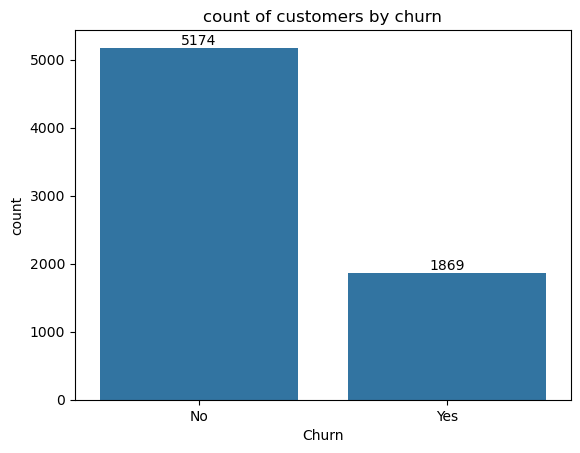

In [29]:
ax = sns.countplot(x = 'Churn',data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customers by churn")
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have chured out 
#not lets explore the reason behind it

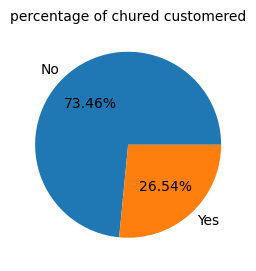

In [31]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
# gb
plt.pie(gb['Churn'],labels = gb.index,autopct = "%1.2f%%")
plt.title("percentage of chured customered",fontsize=10)
plt.show()


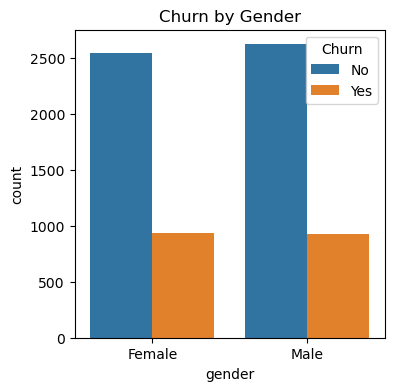

In [37]:
plt.figure(figsize=(4,4))
sns.countplot(x = "gender",data = df,hue ="Churn" )
plt.title("Churn by Gender")
plt.show()

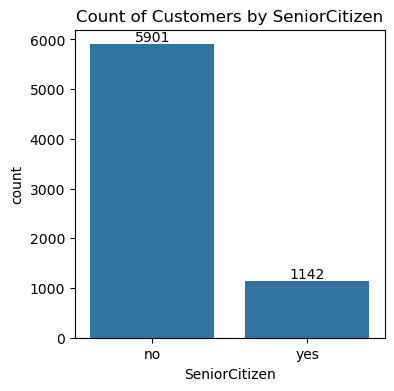

In [44]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen", data=df)   # ← Save the plot to 'ax'
ax.bar_label(ax.containers[0])                   # ← Now it works
plt.title("Count of Customers by SeniorCitizen")
plt.show()



#comparative a greated percentage of people in senior citizen category have churned 

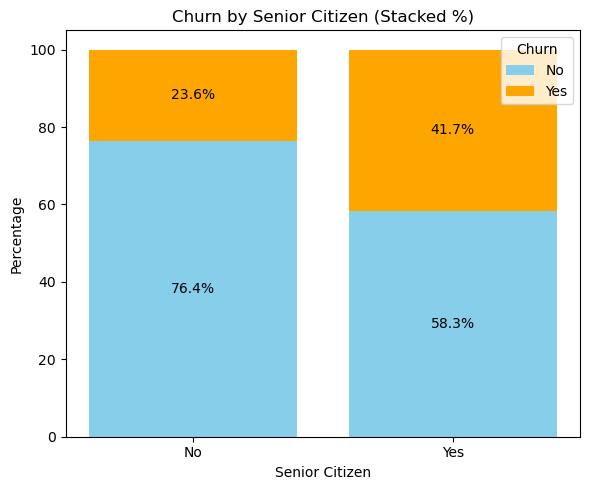

In [40]:
# Step 1: Prepare the data
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Step 2: Plot stacked bar chart
plt.figure(figsize=(6, 5))
bottom_val = [0, 0]  # to keep track of stacking

# Colors for churn categories
colors = ['skyblue', 'orange']

for i, churn_status in enumerate(percentages.columns):
    plt.bar(percentages.index,
            percentages[churn_status],
            bottom=bottom_val,
            label=churn_status,
            color=colors[i])

    # Add percentage labels
    for j in range(len(percentages)):
        value = percentages[churn_status].iloc[j]
        plt.text(x=percentages.index[j],
                 y=bottom_val[j] + value / 2,
                 s=f'{value:.1f}%',
                 ha='center',
                 va='center',
                 color='black',
                 fontsize=10)

    # Update bottom values for stacking
    bottom_val = [bottom_val[j] + percentages[churn_status].iloc[j] for j in range(len(bottom_val))]

# Step 3: Final chart setup
plt.title('Churn by Senior Citizen (Stacked %)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No', 'Yes'])  # 0 = No, 1 = Yes
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

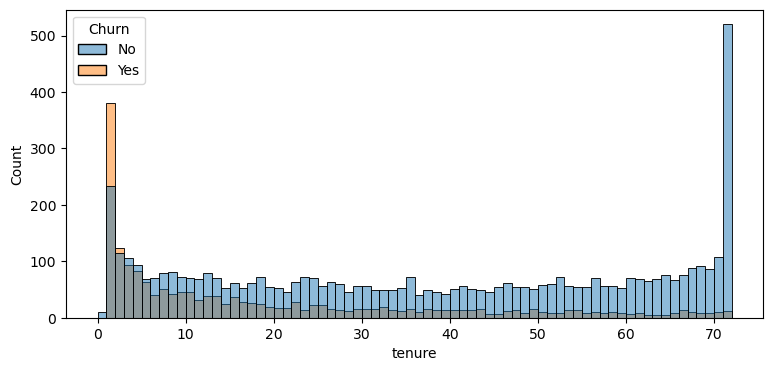

In [47]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data = df,bins = 72,hue = "Churn")
plt.show()


#people who have used our services for a long time have stayed and people who have used our services 1 and 2 month have churned 


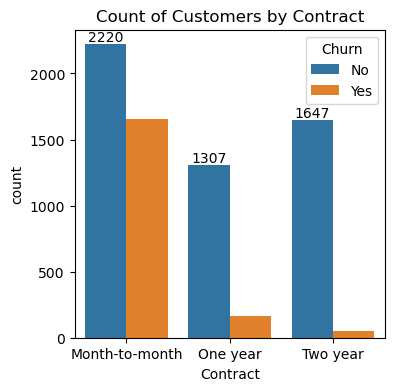

In [49]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="Contract", data=df , hue="Churn")   # ← Save the plot to 'ax'
ax.bar_label(ax.containers[0])                   # ← Now it works
plt.title("Count of Customers by Contract")
plt.show()


In [ ]:
#people who have month to month contract are likely to churn then from those who have 1 or 2 year of contract

In [50]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

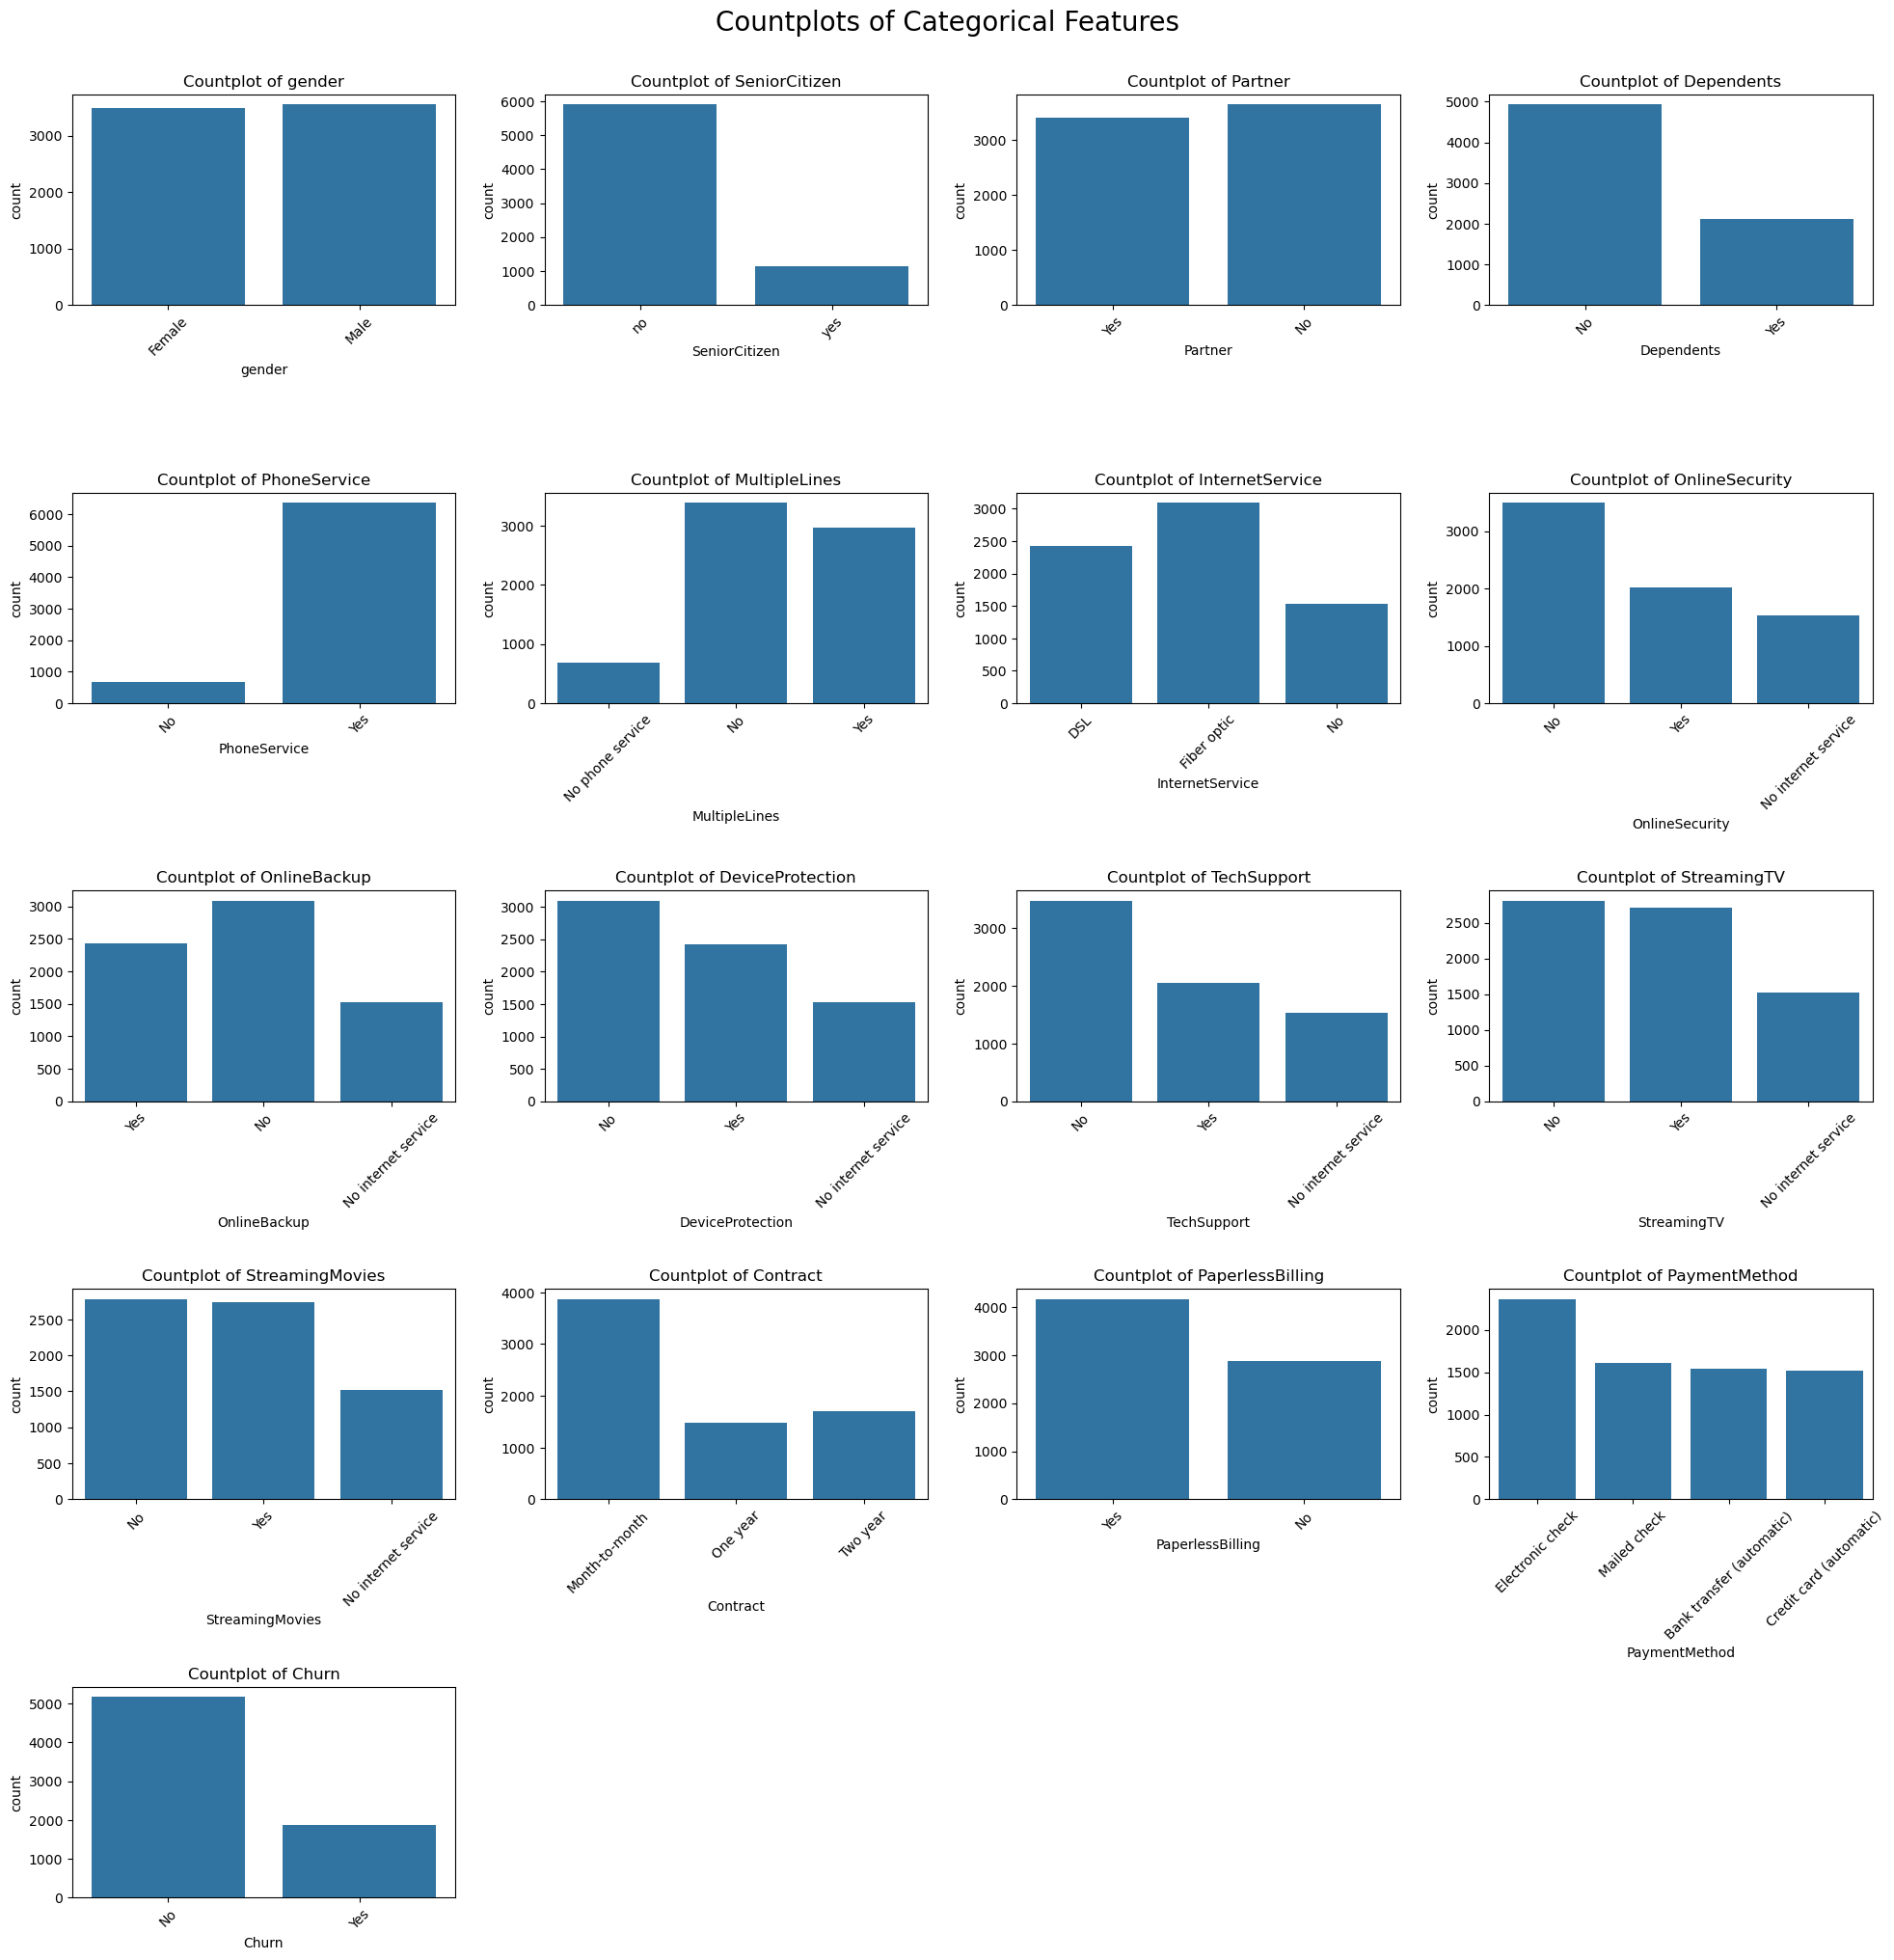

In [52]:
# Step 1: Define all categorical columns (remove numerical ones like 'tenure', 'MonthlyCharges', etc.)
cat_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Step 2: Count how many plots we need
total_plots = len(cat_columns)

# Step 3: Calculate number of rows and columns for subplots
cols = 4  # You can change to 3 if you want bigger plots
rows = (total_plots + cols - 1) // cols  # Ceiling division

# Step 4: Set the figure size based on rows and columns
plt.figure(figsize=(cols * 5, rows * 4))  # Adjust size as needed

# Step 5: Plot each subplot
for i, col in enumerate(cat_columns, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=2.0)

# Step 6: Show all plots
plt.suptitle("Countplots of Categorical Features", fontsize=20, y=1.02)
plt.show()

#The dataset contains multiple categorical features such as gender, SeniorCitizen, Partner, Dependents, PhoneService, InternetService, etc. Each bar plot shows the distribution of values (like Yes/No, Male/Female, types of service). Most customers have PhoneService and do not have dependents. The Churn column shows more customers chose to stay (No) than leave (Yes).

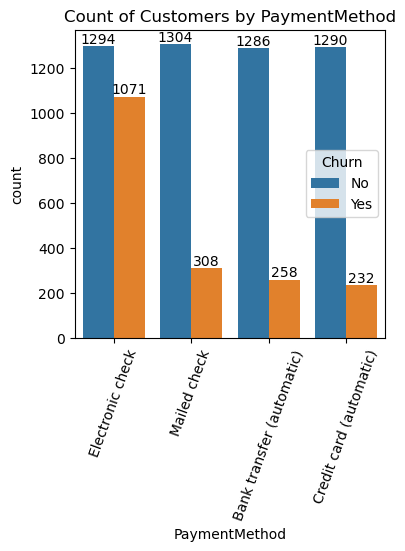

In [62]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="PaymentMethod", data=df , hue="Churn")   # ← Save the plot to 'ax'
ax.bar_label(ax.containers[0])                   # ← Now it works
ax.bar_label(ax.containers[1])   
# ← Now it works
plt.title("Count of Customers by PaymentMethod")
plt.xticks(rotation = 70)
plt.show()

In [ ]:
customer is likely to churn when he is using electronic check as a pyment method 